# Analisi delle componenti principali sul dataset "Wine Red Quality"

## Caricamento del dataset

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Abilita la visualizzazione dei grafici all'interno del notebook.
%matplotlib inline

# Imposta alcuni parametri per la visualizzazione degli array.
np.set_printoptions(threshold=55, edgeitems=10, suppress=True)
pd.set_option('display.max_rows', 10)

# Carica il dataset a partire da un file CSV.
dataframe = pd.read_csv('datasets/wine_quality_red.csv', encoding='utf-8-sig', sep=';')

dataframe

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25,67,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5


## Raccolta di informazioni sul dataset generato

In [2]:
# Calcola la media delle variabili del dataset.
dataframe.mean()

fixed acidity       8.319637
volatile acidity    0.527821
citric acid         0.270976
...
sulphates     0.658149
alcohol      10.422983
quality       5.636023
Length: 12, dtype: float64

In [3]:
# Calcola la varianza delle variabili del dataset.
dataframe.var()

fixed acidity       3.031416
volatile acidity    0.032062
citric acid         0.037947
...
sulphates    0.028733
alcohol      1.135647
quality      0.652168
Length: 12, dtype: float64

In [4]:
# Calcola la deviazione standard delle variabili del dataset.
dataframe.std()

fixed acidity       1.741096
volatile acidity    0.179060
citric acid         0.194801
...
sulphates    0.169507
alcohol      1.065668
quality      0.807569
Length: 12, dtype: float64

In [5]:
# Calcola la matrice di covarianza del dataset.
dataframe.cov()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,3.031416,-0.079851,0.227820,0.281756,0.007679,-2.800921,-6.482346,0.002195,-0.183586,0.054010,-0.114421,0.174424
volatile acidity,-0.079851,0.032062,-0.019272,0.000484,0.000517,-0.019674,0.450426,0.000007,0.006495,-0.007921,-0.038600,-0.056476
citric acid,0.227820,-0.019272,0.037947,0.039434,0.001869,-0.124252,0.227697,0.000134,-0.016298,0.010328,0.022815,0.035612
residual sugar,0.281756,0.000484,0.039434,1.987897,0.003690,2.758611,9.416441,0.000945,-0.018644,0.001321,0.063219,0.015635
chlorides,0.007679,0.000517,0.001869,0.003690,0.002215,0.002738,0.073387,0.000018,-0.001926,0.002962,-0.011092,-0.004900
...,...,...,...,...,...,...,...,...,...,...,...,...
density,0.002195,0.000007,0.000134,0.000945,0.000018,-0.000433,0.004425,0.000004,-0.000100,0.000048,-0.000998,-0.000267
pH,-0.183586,0.006495,-0.016298,-0.018644,-0.001926,0.113653,-0.337699,-0.000100,0.023835,-0.005146,0.033832,-0.007198
sulphates,0.054010,-0.007921,0.010328,0.001321,0.002962,0.091592,0.239471,0.000048,-0.005146,0.028733,0.016907,0.034413
alcohol,-0.114421,-0.038600,0.022815,0.063219,-0.011092,-0.773698,-7.209298,-0.000998,0.033832,0.016907,1.135647,0.409789


In [6]:
# Calcola la matrice di correlazione del dataset.
dataframe.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
...,...,...,...,...,...,...,...,...,...,...,...,...
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397
alcohol,-0.061668,-0.202288,0.109903,0.042075,-0.221141,-0.069408,-0.205654,-0.496180,0.205633,0.093595,1.000000,0.476166


Frequenza delle classi del dataset:
5    681
6    638
7    199
4     53
8     18
3     10
dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f848e167860>]], dtype=object)

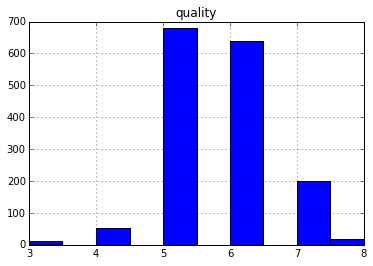

In [7]:
# Mostra la frequenza delle classi del dataset.
print("Frequenza delle classi del dataset:\n{0}".format(dataframe["quality"].value_counts()))

# Disegna l'istogramma delle classi del dataset.
dataframe.hist(column="quality")

## Manipolazione del dataset

Si individua, di seguito, il sottoinsieme del dataset costituito dalle righe che presentano le due classi più frequenti, ovvero la classe 5 e la classe 6, perché si è interessati a studiare la separabilità lineare del dataset al variare del numero di componenti principali considerate.

In [8]:
# Considera le righe che si riferiscono alla classe 5 o alla classe 6.
dataset_subset = dataframe.loc[dataframe["quality"].isin([5, 6])]

Si divide, di seguito, il dataset in due nella parte privata dell'attributo di classe e nella parte costituita solo dall'attributo di classe, in modo che si possa applicare l'analisi delle componenti principali solamente sulla prima parte, la quale è la parte realmente informativa ai fini di tale analisi, dato che la seconda parte costituisce un semplice attributo discreto riguardante, appunto, la classe.

In [9]:
# Seleziona la parte del dataset contenente tutti gli attributi fino all'attributo di classe escluso.
dataset_selection = dataset_subset.ix[:, 0:11]

# Seleziona la parte del dataset contenente solamente l'attributo relativo alla classe.
dataset_selection_classes = dataset_subset.ix[:, 11]

# Utilizzando Pandas, si possono rimuovere colonne del dataset in modo molto semplice.
# Se si volessero, ad esempio, eliminare le colonne 5 e 6 relative agli attributi chiamati
# "free sulfur dioxide" e "total sulfur dioxide", si potrebbe eseguire la seguente istruzione:
# dataset_selection.drop(dataset_selection.columns[[5, 6]], axis=1, inplace=True)

## Analisi delle componenti principali

L'analisi delle componenti principali richiede che il dataset sia stato centrato rispetto alla media.

Ciò equivale a calcolare centered_dataset = dataset - np.mean(dataset, axis=0).

Si effettua, di seguito, tale operazione utilizzando Scikit-learn.

In [10]:
# Se si volesse normalizzare anche rispetto alla deviazione standard,
# bisognerebbe impostare il parametro with_std uguale a True.
from sklearn.preprocessing import StandardScaler
centered_dataset_selection = StandardScaler(with_std=False).fit_transform(dataset_selection)

### Metodo 1: implementazione ed esecuzione della PCA mediante NumPy
Si effettua, di seguito, l'implementazione e l'esecuzione della PCA mediante NumPy.
L'implementazione è stata effettuata in due modi diversi:
- principal_component_analysis: effettua la PCA determinando e riordinando autovettori e autovalori della matrice di covarianza del dataset.
- principal_component_analysis_svd: effettua la PCA direttamente a partire dalla decomposizione ai valori singolari del dataset.

N.B.: il segno dei risultati può differire tra le diverse implementazioni della PCA, dato che esso dipende dal verso degli assi principali individuati.

È preferibile implementare la PCA mediante SVD in quanto in tale maniera non si deve effettuare il calcolo esplicito della matrice di covarianza, da cui possono derivare problemi di stabilità numerica. Una matrice che, sotto tale aspetto, risulta problematica è, ad esempio, la matrice di Läuchli.

In [11]:
def principal_component_analysis(dataset, k=None):
    """Effettua la PCA sulla matrice di covarianza di un dataset.

    Si assume che il dataset sia stato precedentemente centrato rispetto alla media.
    Se si volesse effettuare la PCA sulla matrice di correlazione del dataset,
    basterebbe normalizzare il dataset rispetto alla deviazione standard
    e poi applicare la PCA sulla matrice di covarianza di tale dataset.

    Args:
        dataset: matrice costituita sulle righe dai campioni e sulle colonne dalle feature.
        k: None se non si vuole troncare, altrimenti numero di componenti principali da considerare.

    Returns:
        principal_axes: matrice avente come colonne gli assi principali determinati dalla PCA.
        eigenvalues: autovalori determinati dalla PCA.

    """
    # Calcola la matrice di covarianza del dataset.
    cov_matrix = np.cov(dataset.T)

    # Calcola autovalori e autovettori del dataset.
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Ordina in modo decrescente le autocoppie rispetto ai loro autovalori.
    indexes = np.argsort(-eigenvalues)
    eigenvalues = eigenvalues[indexes]
    principal_axes = eigenvectors[:, indexes]

    # Effettua il troncamento se k è diverso da None.
    if k is not None:
        principal_axes = principal_axes[:, :k]

    # Restituisce la matrice degli assi principali e il vettore degli autovalori.
    return [principal_axes, eigenvalues]

def principal_component_analysis_svd(dataset, k=None):
    """Effettua la PCA sulla matrice di covarianza di un dataset mediante la SVD.

    Si assume che il dataset sia stato precedentemente centrato rispetto alla media.
    Se si volesse effettuare la PCA sulla matrice di correlazione del dataset,
    basterebbe normalizzare il dataset rispetto alla deviazione standard
    e poi applicare la PCA sulla matrice di covarianza di tale dataset.

    Args:
        dataset: matrice costituita sulle righe dai campioni e sulle colonne dalle feature.
        k: None se non si vuole troncare, altrimenti numero di componenti principali da considerare.

    Returns:
        principal_axes: matrice avente come colonne gli assi principali determinati dalla PCA.
        eigenvalues: autovalori determinati dalla PCA.

    """
    # Calcola la decomposizione ai valori singolari del dataset.
    U, S, V = np.linalg.svd(dataset, full_matrices=False)

    # Determina gli assi principali.
    principal_axes = V.T

    # Determina gli autovalori.
    eigenvalues = (S ** 2) / dataset.shape[0]

    # Restituisce la matrice degli assi principali e il vettore degli autovalori.
    return [principal_axes, eigenvalues]

def pca_projections(dataset, principal_axes):
    """Proietta un dataset sugli assi principali determinando le componenti principali.

    Args:
        dataset: matrice costituita sulle righe dai campioni e sulle colonne dalle feature.
        principal_axes: matrice avente come colonne gli assi principali determinati dalla PCA.

    Returns:
        pca_components: matrice avente come colonne le componenti principali determinate dalla PCA.

    """
    pca_components = dataset.dot(principal_axes)
    return pca_components

# Effettua la PCA sulla matrice di covarianza del dataset mediante la SVD.
principal_axes, eigenvalues = principal_component_analysis_svd(centered_dataset_selection)
print("Matrice degli assi principali:\n", pd.DataFrame(principal_axes))
print("\nAutovalori:\n", eigenvalues)

# Effettua la PCA sulla matrice di covarianza del dataset.
# principal_axes, eigenvalues = principal_component_analysis(centered_dataset_selection)
# print("Matrice degli assi principali:\n", pd.DataFrame(principal_axes))
# print("\nAutovalori:\n", eigenvalues)

Matrice degli assi principali:
           0         1         2         3         4         5         6   \
0   0.005096 -0.029724 -0.945135  0.303679 -0.058818  0.073102  0.012309   
1  -0.000371 -0.001908  0.021429 -0.012119  0.028280  0.664116  0.460514   
2  -0.000289 -0.003671 -0.070547  0.017059 -0.032109 -0.527066 -0.250376   
3  -0.009007  0.022587 -0.309398 -0.948656  0.060459 -0.004496  0.001072   
4  -0.000082 -0.000353 -0.003097 -0.000393  0.009295 -0.065282  0.109490   
..       ...       ...       ...       ...       ...       ...       ...   
6  -0.975357 -0.220360  0.003193  0.002333 -0.010123  0.000619 -0.000342   
7  -0.000005 -0.000030 -0.000788 -0.000145  0.000783  0.000279  0.001280   
8   0.000335  0.003653  0.057459 -0.021585 -0.020012  0.116345 -0.039003   
9  -0.000346 -0.000009 -0.015923  0.008549 -0.012566 -0.506735  0.843468   
10  0.006130  0.018362  0.038642 -0.075742 -0.995053  0.034740  0.011668   

          7         8         9         10  
0   0.0598

Si mostra, di seguito, il cerchio di correlazione tra le feature e le componenti principali determinate dalla PCA.

Coefficienti di correlazione:
[[ 0.10143114 -0.13517905]
 [-0.07419118 -0.08710421]
 [-0.05145608 -0.14946821]
 [-0.21554826  0.12351346]
 [-0.05757511 -0.05684297]
 [-0.70330711  0.71086382]
 [-0.9986701  -0.05155484]
 [-0.08450397 -0.12743321]
 [ 0.07366697  0.18353979]
 [-0.06932453 -0.00041503]
 [ 0.21115974  0.14453576]]


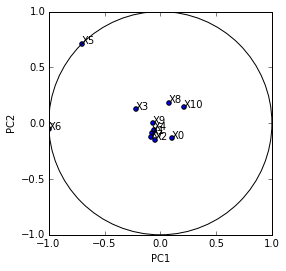

In [12]:
from scipy.stats import pearsonr

def pca_correlations(dataset, principal_component_1, principal_component_2):
    """Calcola le correlazioni tra le feature e le prime due componenti principali determinate dalla PCA.

    Args:
        dataset: matrice costituita sulle righe dai campioni e sulle colonne dalle feature.
        principal_component_1: prima componente principale determinata dalla PCA.
        principal_component_2: seconda componente principale determinata dalla PCA.

    Returns:
        correlations: matrice avente come righe le correlazioni relative a ciascuna feature.

    """
    correlations = []
    for feature in dataset.T:
        correlation_comp_1 = pearsonr(feature, principal_component_1)[0]
        correlation_comp_2 = pearsonr(feature, principal_component_2)[0]
        correlations.append([correlation_comp_1, correlation_comp_2])
    correlations = np.array(correlations)
    return correlations

def draw_correlation_circle(correlations):
    """Disegna il cerchio delle correlazioni a partire dalla matrice delle correlazioni specificata.

    Args:
        correlations:  matrice avente come righe le correlazioni relative a ciascuna feature.

    """
    fig, ax = plt.subplots()
    plt.scatter(correlations[:, 0], correlations[:, 1])
    for i, xy in enumerate(zip(correlations[:, 0], correlations[:, 1])):
        ax.annotate("X{0}".format(i), xy=xy) 
    circle = plt.Circle((0,0),1, facecolor='none')
    fig.gca().add_artist(circle)
    ax.set_aspect('equal')
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()

projections = pca_projections(centered_dataset_selection, principal_axes[:, :2])
correlations = pca_correlations(centered_dataset_selection, projections[:, 0], projections[:, 1])
print("Coefficienti di correlazione:\n{0}".format(correlations))
draw_correlation_circle(correlations)

Si mostra, di seguito, uno screeplot degli autovalori determinati dalla PCA.

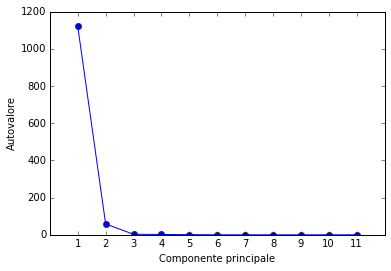

In [13]:
def draw_screeplot(eigenvalues, logarithm=False):
    """Disegna uno screeplot degli autovalori determinati dalla PCA.

    Args:
        eigenvalues: autovalori determinati dalla PCA.
        logarithm: True se si vuole uno screeplot logaritmico, False altrimenti.

    """
    plt.figure()
    indexes = np.arange(len(eigenvalues)) + 1
    if logarithm:
        plt.plot(indexes, np.log(eigenvalues), 'o-')
    else:
        plt.plot(indexes, eigenvalues, 'o-')
    plt.xlabel("Componente principale")
    plt.ylabel("Autovalore")
    plt.xticks(indexes)
    plt.show()

draw_screeplot(eigenvalues)

Si mostrano, di seguito, le varianze cumulative conservate dalle componenti principali ottenute con la PCA.

In [14]:
def cumulative_variances(eigenvalues):
    """Calcola le varianze cumulative conservate dalle componenti principali determinate dalla PCA.

    Args:
        eigenvalues: autovalori determinati dalla PCA.

    Returns:
        cumulative_vars: varianze cumulative conservate dalle componenti principali determinate dalla PCA.

    """
    cumulative_vars = np.cumsum(eigenvalues) / np.sum(eigenvalues)
    return cumulative_vars

cumulative_vars = cumulative_variances(eigenvalues)
for i, eigenvalue in enumerate(eigenvalues):
    print("Autovalore {0}\t\t{1}".format(i, eigenvalue))
    print("Varianza cumulativa:\t{0}\n".format(cumulative_vars[i]))

Autovalore 0		1121.1298595942947
Varianza cumulativa:	0.9459006412566635

Autovalore 1		58.53431339806316
Varianza cumulativa:	0.9952862178737937

Autovalore 2		2.895528392529
Varianza cumulativa:	0.9977291839047414

Autovalore 3		1.7293086548715575
Varianza cumulativa:	0.9991882068284246

Autovalore 4		0.8772475296200813
Varianza cumulativa:	0.9999283432129008

Autovalore 5		0.03868572593514449
Varianza cumulativa:	0.9999609824764584

Autovalore 6		0.02343944310028526
Varianza cumulativa:	0.9999807584052408

Autovalore 7		0.011394447421163316
Varianza cumulativa:	0.9999903719348693

Autovalore 8		0.009897307706528817
Varianza cumulativa:	0.9999987223232085

Autovalore 9		0.0015138535213842957
Varianza cumulativa:	0.9999999995659867

Autovalore 10		5.14414827882087e-07
Varianza cumulativa:	1.0



Calcola le proiezioni del dataset rispetto ai primi due assi principali, in quanto solo in tale maniera si ottiene un contenuto informativo accettabile. Dato che sono stati considerati due assi principali, tali proiezioni giacciono su un piano bidimensionale.

In [15]:
pca_components = pca_projections(centered_dataset_selection, principal_axes[:, :2])

print("\nProiezioni nel nuovo sottospazio vettoriale:\n{0}".format(pd.DataFrame(pca_components)))


Proiezioni nel nuovo sottospazio vettoriale:
              0          1
0     15.757257  -1.940469
1    -19.515811   4.440632
2     -4.630358  -2.446307
3    -10.902158  -1.930887
4     15.757257  -1.940469
...         ...        ...
1314   1.376996  16.378545
1315  -6.991699  21.684203
1316   5.940162  14.349308
1317   1.373597  16.382163
1318   6.399565   3.226228

[1319 rows x 2 columns]


Si disegna, di seguito, un grafico di dispersione dei punti proiettati nel sottospazio individuato dai primi due assi principali. Ogni punto è colorato in base alla sua classe di appartenenza. Come si può notare, non si ha una situazione di separabilità lineare. Comunque la PCA ha permesso di ottenere un dataset ridotto, anche se bisogna interpretare opportunamente gli assi principali.

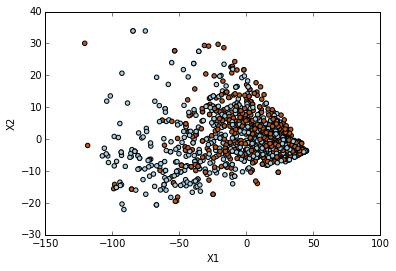

In [16]:
plt.figure()
targets = dataset_selection_classes
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=targets, cmap=plt.cm.Paired)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

Consideriamo 3 componenti principali, anziché 2, per ottenere una visualizzazione in 3 dimensioni.

N.B. In ogni caso lo screeplot suggerisce che bisognerebbe considerare solamente 2 componenti principali.


Proiezioni nel nuovo sottospazio vettoriale:
[[ 15.75725671  -1.94046874   1.06676581]
 [-19.51581141   4.44063203   0.26756297]
 [ -4.63035848  -2.44630696   0.5384638 ]
 [-10.90215842  -1.93088713  -2.62783684]
 [ 15.75725671  -1.94046874   1.06676581]
 [  9.46542241  -1.31578279   1.07179989]
 [ -9.50264446  -3.57384931   0.66159059]
 [-51.91956609 -10.96731815  -0.24292285]
 [-15.36396198  -4.85961695   1.74095066]
 [-51.91956609 -10.96731815  -0.24292285]
 ..., 
 [-32.1578589    5.83637204  -0.29038619]
 [ 11.48596283  12.52677238   1.86515386]
 [ 22.46369043   4.7904915    2.97153345]
 [  5.94016171  14.34930798   1.64433756]
 [  8.10808619  13.76404902   1.25807903]
 [  1.37699629  16.37854506   1.76865338]
 [ -6.99169882  21.68420277   1.88374732]
 [  5.94016171  14.34930798   1.64433756]
 [  1.37359665  16.3821633    2.04361465]
 [  6.3995647    3.22622829   1.74664901]]


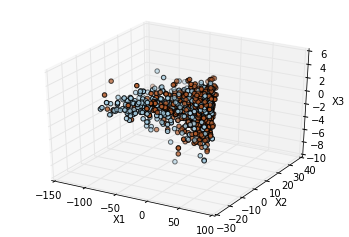

In [17]:
pca_components_3d = pca_projections(centered_dataset_selection, principal_axes[:, :3])

print("\nProiezioni nel nuovo sottospazio vettoriale:\n{0}".format(pca_components_3d))

fig = plt.figure()
ax = fig.add_subplot("111", projection="3d")
targets = dataset_selection_classes
ax.scatter(pca_components_3d[:, 0], pca_components_3d[:, 1], pca_components_3d[:, 2], c=targets, cmap=plt.cm.Paired)
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("X3")
plt.show()

### Metodo 2: esecuzione della PCA mediante Scikit-learn

Si effettua, di seguito, l'esecuzione della PCA mediante Scikit-learn. La PCA è effettuata considerando la matrice di covarianza, quindi se si volesse considerare la matrice di correlazione bisognerebbe normalizzare il dataset rispetto alla deviazione standard. Si eseguono tutte le operazioni sul dataset centrato, per coerenza con il precedente metodo, anche se Scikit-learn centra automaticamente i dati rispetto alla loro media prima di effettuare la PCA.

In [18]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(centered_dataset_selection)

print("Matrice degli assi principali:\n", pd.DataFrame(pca.components_.T))
print("\nPercentuale di varianza cumulativa conservata dalle componenti principali:\n{0}"
      .format(np.cumsum(pca.explained_variance_ratio_)))

Matrice degli assi principali:
           0         1         2         3         4         5         6   \
0   0.005096 -0.029724 -0.945135  0.303679 -0.058818  0.073102  0.012309   
1  -0.000371 -0.001908  0.021429 -0.012119  0.028280  0.664116  0.460514   
2  -0.000289 -0.003671 -0.070547  0.017059 -0.032109 -0.527066 -0.250376   
3  -0.009007  0.022587 -0.309398 -0.948656  0.060459 -0.004496  0.001072   
4  -0.000082 -0.000353 -0.003097 -0.000393  0.009295 -0.065282  0.109490   
..       ...       ...       ...       ...       ...       ...       ...   
6  -0.975357 -0.220360  0.003193  0.002333 -0.010123  0.000619 -0.000342   
7  -0.000005 -0.000030 -0.000788 -0.000145  0.000783  0.000279  0.001280   
8   0.000335  0.003653  0.057459 -0.021585 -0.020012  0.116345 -0.039003   
9  -0.000346 -0.000009 -0.015923  0.008549 -0.012566 -0.506735  0.843468   
10  0.006130  0.018362  0.038642 -0.075742 -0.995053  0.034740  0.011668   

          7         8         9         10  
0   0.0598

La classe PCA di Scikit-learn non restituisce lo spettro della matrice di covarianza del dataset specificato.
Calcoliamo, pertanto, gli autovalori di tale matrice partendo dalle percentuali di varianza già valutate. Tali autovalori saranno già ordinati in modo decrescente perché i valori di partenza lo erano.

In [19]:
sk_eigenvalues = pca.explained_variance_ratio_ * np.trace(np.cov(centered_dataset_selection.T))
print("Autovalori della matrice di covarianza:\n{0}".format(sk_eigenvalues))

Autovalori della matrice di covarianza:
[ 1121.98048923    58.57872486     2.8977253      1.73062073     0.87791312
     0.03871508     0.02345723     0.01140309     0.00990482     0.001515
     0.00000051]


Si mostra, di seguito, uno screeplot degli autovalori determinati dalla PCA. Ciò è fatto richiamando l'apposita funzione definita precedentemente.

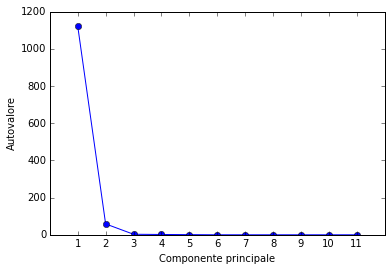

In [20]:
draw_screeplot(sk_eigenvalues)

Sono necessarie le prime due componenti principali per ottenere un contenuto informativo accettabile, pertanto applichiamo la PCA con k=2.

In [21]:
pca = PCA(n_components=2)
sk_projections = pca.fit_transform(centered_dataset_selection)
print("Proiezioni:\n{0}".format(sk_projections))

Proiezioni:
[[ 15.75725671  -1.94046874]
 [-19.51581141   4.44063203]
 [ -4.63035848  -2.44630696]
 [-10.90215842  -1.93088713]
 [ 15.75725671  -1.94046874]
 [  9.46542241  -1.31578279]
 [ -9.50264446  -3.57384931]
 [-51.91956609 -10.96731815]
 [-15.36396198  -4.85961695]
 [-51.91956609 -10.96731815]
 ..., 
 [-32.1578589    5.83637204]
 [ 11.48596283  12.52677238]
 [ 22.46369043   4.7904915 ]
 [  5.94016171  14.34930798]
 [  8.10808619  13.76404902]
 [  1.37699629  16.37854506]
 [ -6.99169882  21.68420277]
 [  5.94016171  14.34930798]
 [  1.37359665  16.3821633 ]
 [  6.3995647    3.22622829]]
